In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', -1)

In [ ]:
data = pd.read_csv('../../dataset/entityData_Sep/merged_465_entity_uri_entity_sep_google_pre.csv',encoding='utf-8', dtype=str)
data.info()

In [ ]:
data.head(10)

In [ ]:
def calculateSentLength(sent):
    sent_tokens = str(sent.encode('utf-8')).split()
    return len(sent_tokens)
   
def calculateSentLengthUri(sent):
    sent = sent.replace('wikidataentityseparation ', '')
    sent_tokens = str(sent.encode('utf-8')).split()
    return len(sent_tokens)

def calculateSentLength1(sentsplit):
    return len(sentsplit)

In [ ]:
data = data.dropna(subset=['sequence1','sequence2','uriSequence2'])
data.info()

In [ ]:
#data['seq1len'] = data['sequence1'].apply(lambda sent:calculateSentLength(sent))
data['seq1len'] = data['sequence1'].str.split().apply(lambda sent:calculateSentLength1(sent))

In [ ]:
#data['seq2len'] = data['sequence2'].apply(lambda sent:calculateSentLength1(sent))
data['seq2len'] = data['sequence2'].str.split().apply(lambda sent:calculateSentLength1(sent))

In [ ]:
data.head(5)

In [ ]:
#data['uriSeq2len'] = data['uriSequence2'].apply(lambda sent:calculateSentLengthUri(sent))
data['uriSeq2len'] = data['uriSequence2'].str.replace(' wikidataentityseparation', '')
data['uriSeq2len'] = data['uriSeq2len'].str.split().apply(lambda sent:calculateSentLength1(sent))
#data['seq2len'] = data['sequence2'].str.split().len()

In [ ]:
data.head(10)

In [ ]:
data = data.drop_duplicates(subset=['sequence1'],keep='first')
data = data.reset_index(drop=True)

In [ ]:
data.to_csv('../../dataset/entityData_Sep/merged_465_entity_uri_entity_sep_google_pre_seq.csv',encoding='utf-8',index=False)

In [ ]:
data = pd.read_csv('../../dataset/entityData_Sep/merged_465_entity_uri_entity_sep_google_pre_seq.csv', encoding='utf-8')
data.info()

In [ ]:
data_Analysis = data[['seq1len', 'seq2len', 'uriSeq2len']]

In [ ]:
data_Analysis.describe(include='all')

In [ ]:
#sentence range need to be set according to requirement

#data_ranged = data[(data['seq1len']<=50) & (data['seq1len']>=10)]
data_ranged = data[(data['seq1len']<25) & (data['seq2len']<25) & (data['uriSeq2len']<25)]

data_ranged.describe()

In [ ]:
data_ranged = data_ranged.reset_index(drop=True)
data_ranged.head(20)

In [ ]:
#fig, ax = plt.subplots()
#ax.set_xlim(0,2000)
brange = np.arange(1,50,5)
print (brange[0:10])
plot = data_ranged[['seq1len','seq2len']].plot.hist(bins=brange, histtype='bar', alpha=0.6)
fig = plot.get_figure()
fig.tight_layout()
fig.savefig('seq1lenVsseq2len.png', dpi=120)

In [ ]:
brange = np.arange(1,50,5)
print (brange[0:10])
plot = data_ranged[['seq1len','uriSeq2len']].plot.hist(bins=brange, histtype='bar', alpha=0.6)
fig = plot.get_figure()
fig.tight_layout()
fig.savefig('seq1lenVsuriSeq2len.png', dpi=120)

In [ ]:
sum(data_ranged['seq2len'] < 1)

In [ ]:
data_ranged = data_ranged.reset_index(drop=True)
data_ranged.head(5)
data_ranged.to_csv('../../dataset/entityData_Sep/merged_465_entity_uri_entity_sep_google_pre_seq_0_25.csv',encoding='utf-8',index=False)

In [ ]:
data_ranged.info()

In [ ]:
#All: surfaceForm_wikiUri_wikiEntity_withnotfound
# And 0_25 Sequence : surfaceForm_wikiUri_wikiEntity_withnotfound

#!/usr/bin/env python
# coding: utf-8

# In[1]:
#!pip3 install matplotlib

from __future__ import absolute_import,unicode_literals, print_function, division

import torch
from torch.jit import script, trace
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import csv
import random
import re
import os
import unicodedata
import codecs
from io import open
import itertools
import math
#import bcolz
import pickle
import pandas as pd
import numpy as np
import multiprocessing as mp
import time
import math
#import matplotlib.pyplot as plt
#plt.switch_backend('agg')
#import matplotlib.ticker as ticker
import json
import requests
pd.set_option('display.max_colwidth', -1)




df = pd.read_csv('../../dataset/entityData_Sep/surfaceForm_wikiUri_sep.csv', encoding='utf-8')
d = pd.read_csv('../../dataset/entityData/WikidataLabel_clean_noise.csv', encoding='utf-8')
df.head()
labelDict = dict(zip(d.qValue, d.wikidataLabel))

def replaceQuri(QUri):
    if QUri in labelDict:
        return labelDict[QUri]
    else:
        return "notfoundinthedict"

df.loc[:,'WikidataLabel'] = df.loc[:,'QUri'].apply(replaceQuri)
#df.to_csv('../dataset/entityData_Sep/surfaceForm_wikiUri_wikiEntity_withnotfound.csv', encoding='utf-8', index=False)
df_data = pd.read_csv('../../dataset/entityData_Sep/merged_465_entity_uri_entity_sep_google_pre_seq_0_25.csv', encoding='utf-8')

uriList = []


def createSet(urilist):
    #print (urilist)
    uriList.append(set(urilist))
    return len(uriList)
    
df_data['uri'].str.split().apply(createSet)
luri = [u.strip() for l in uriList for u in l]

uriSet = set(luri)

len(uriSet), len(luri)
df.info(), df.head()


df_0_25 = df[df['QUri'].isin(list(uriSet))]
df_0_25.head(25), df.head(25)
df_0_25.describe()
df.describe()
print (sum(df_0_25.duplicated(subset=['QUri'])))
#df_0_25.to_csv('../../dataset/entityData_Sep/surfaceForm_wikiUri_wikiEntity_withnotfound_withdupQuri_0_25.csv', encoding='utf-8', index=False)


#in 0_25 how many sruface-froms are different from WikidataEntites

'''def changeLowerCase(str1):
    return str(str1).lower()

df_0_25_lower = df_0_25.applymap(changeLowerCase)
df_0_25_lower['isEqual'] = df_0_25_lower['Surface-Form'].str.strip().replace('s/+',"") == df_0_25_lower['WikidataLabel'].str.strip().str.replace('s/+',"")
display (df_0_25_lower.head(5))
print ('Total Entities {}'.format(df_0_25_lower['isEqual'].count()))
print ("Entities which are not equal {}".format(df_0_25_lower['isEqual'].count() - sum(df_0_25_lower['isEqual'])))
'''
Total Entities 733901
Entities which are not equal 455825
'''

#Remove Quri columns for elastic search
df_0_25_lower1 = df_0_25_lower[['Surface-Form', 'WikidataLabel']]
df_0_25_lower1.to_csv('../../dataset/entityData_Sep/surfaceForm_wikiEntity_0_25.csv', encoding='utf-8', index=False)'''

In [ ]:
def changeLowerCase(str1):
    return str(str1).lower()

df_0_25_lower = df_0_25.applymap(changeLowerCase)
df_0_25_lower['isEqual'] = df_0_25_lower['Surface-Form'].str.strip().replace('s/+',"") == df_0_25_lower['WikidataLabel'].str.strip().str.replace('s/+',"")
display (df_0_25_lower.head(5))
print ('Total Entities {}'.format(df_0_25_lower['isEqual'].count()))
print ("Entities which are not equal {}".format(df_0_25_lower['isEqual'].count() - sum(df_0_25_lower['isEqual'])))
'''
Total Entities 733901
Entities which are not equal 455825
'''

#Remove Quri columns for elastic search
df_0_25_lower1 = df_0_25_lower[['Surface-Form', 'WikidataLabel']]
df_0_25_lower1.to_csv('../../dataset/entityData_Sep/surfaceForm_wikiEntity_0_25.csv', encoding='utf-8', index=False)

In [ ]:
#NotFoundWikidataEntites
df = pd.read_csv('../dataset/trainingData/Nov13/formatted_seq_0_25.txt',encoding='utf-8', sep='\t', header=None)
df.head(10)
df.describe()
l = df[df.columns[3]].str.split().tolist()
lmod = sorted(set([tmpl1.strip() for tmpl in l for tmpl1 in tmpl]))
print (len(lmod))
df1= pd.read_csv('../dataset/entity_uri_entity_dups.csv')
df2= df1[df1['UriEntity']=='NotFoundinQdict']
df2.describe()
uriList = sorted(df2['Uri'].tolist())
print (len(uriList), uriList[0:10])

def searchNotfoundUri(uri):
    uri = str(uri).strip().split()
    for u in uri:
        if u in uriList:
            return True
    return False

df['isMatched'] = df[df.columns[3]].apply(searchNotfoundUri)
df[df['isMatched']==True]

In [47]:
# Length Describe
import pandas as pd
df = pd.read_csv('../../dataset/entityData_Sep/surfaceForm_wikiUri_wikiEntity_withnotfound_withdupQuri_0_25.csv', encoding='utf-8')
df = df.dropna()

print (df.head(5))
def lengthofSequence(seq):
    return len(str(seq.encode('utf-8')).split())

df['lenSur'] = df['Surface-Form'].apply(lengthofSequence)
df['lenWiki'] = df['WikidataLabel'].apply(lengthofSequence)

#df['lenWiki'] = df['wikiAltLabel'].apply(lengthofSequence)


df.head(5)
#df.sort_values(by=['len'], axis=0, ascending=False)



              Surface-Form    QUri             WikidataLabel
0  Austroasiatic languages  Q33199  austro asiatic languages
1                Mon–Khmer  Q33199  austro asiatic languages
2          language family  Q25295           language family
3           Southeast Asia  Q11708            southeast asia
4                    India    Q668                     india


,Surface-Form,QUri,WikidataLabel,lenSur,lenWiki
0,Austroasiatic languages,Q33199,austro asiatic languages,2,3
1,Mon–Khmer,Q33199,austro asiatic languages,1,3
2,language family,Q25295,language family,2,2
3,Southeast Asia,Q11708,southeast asia,2,2
4,India,Q668,india,1,1


[ 1  6 11 16 21 26 31 36 41 46]


,lenSur,lenWiki
count,732601.000000,732601.000000
mean,1.932808,2.210617
std,0.877253,1.137085
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,3.000000
max,7.000000,19.000000


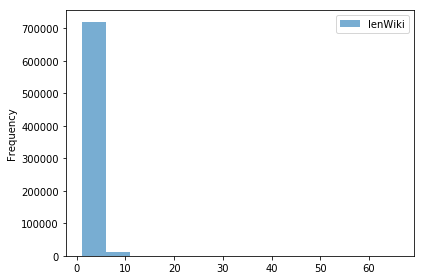

In [48]:
import numpy as np
brange = np.arange(1,70,5)
print (brange[0:10])
plot = df[['lenWiki']].plot.hist(bins=brange, histtype='bar', alpha=0.6)
fig = plot.get_figure()
fig.tight_layout()
#fig.savefig('wikialtLabellen.png', dpi=120)

df[['lenSur','lenWiki']].describe()